# Smart Meters

This example uses the following datasets to predict peoples' electricity consumption. You can download the Jupyter Notebook of the study <a href="smart_meters.ipynb">here</a>. We'll use the following datasets:

<a href="../../data/smart_meters/sm_consumption.csv">sm_consumption</a>
<ul class="ul_content">
    <li><b>dateUTC: </b>Date and time of the record</li>
    <li><b>meterID: </b>Smart meter ID</li>
    <li><b>value: </b>Electricity consumed during 30 minute interval (in kWh)</li>
</ul>

<a href="../../data/smart_meters/sm_weather.csv">sm_weather</a>
<ul class="ul_content">
    <li><b>dateUTC: </b>Date and time of the record</li>
    <li><b>temperature: </b>Temperature</li>
    <li><b>humidity: </b>Humidity</li>
</ul>

<a href="../../data/smart_meters/sm_meters.csv">sm_meters</a>
<ul class="ul_content">
    <li><b>longitude: </b>Longitude</li>
    <li><b>latitude: </b>Latitude</li>
    <li><b>residenceType: </b>1 for Single-Family; 2 for Multi-Family; 3 for Appartement</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'0.9.0'

Create the vDataFrames of the datasets:

meterID                dateUTC     value  
1            0    2014-01-01 11:00:00     0.029  
2            0    2014-01-01 13:45:00     0.277  
3            0    2014-01-02 10:45:00     0.321  
4            0    2014-01-02 11:15:00     0.305  
5            0    2014-01-02 13:45:00     0.358  
6            0    2014-01-02 15:30:00     0.115  
7            0    2014-01-03 08:30:00     0.071  
8            0    2014-01-04 23:45:00     0.323  
9            0    2014-01-06 01:15:00     0.085  
10           0    2014-01-06 21:45:00     0.713  
11           0    2014-01-07 00:15:00     0.242  
12           0    2014-01-07 23:00:00      0.09  
13           0    2014-01-09 05:30:00     0.115  
14           0    2014-01-09 15:00:00     0.928  
15           0    2014-01-09 18:15:00      1.09  
16           0    2014-01-10 10:00:00      0.07  
17           0    2014-01-10 14:30:00    10.832  
18           0    2014-01-10 15:30:00     3.288  
19           0    2014-01-10 18:00:00      0.42  
20           0    2014-01-11 10:45:00     1.045  
21           0    2014-01-12 07:45:00     0.091  
22           0    2014-01-13 19:45:00     0.249  
23           0    2014-01-13 20:15:00      0.34  
24           0    2014-01-14 13:00:00     0.099  
25           0    2014-01-14 14:00:00       0.2  
26           0    2014-01-14 14:45:00     0.865  
27           0    2014-01-14 22:00:00     0.716  
28           0    2014-01-15 03:45:00      0.05  
29           0    2014-01-15 11:15:00     0.052  
30           0    2014-01-15 11:30:00     0.038  
31           0    2014-01-15 23:15:00     0.239  
32           0    2014-01-16 19:30:00     1.422  
33           0    2014-01-17 15:00:00     0.291  
34           0    2014-01-18 00:30:00     0.828  
35           0    2014-01-19 03:00:00     0.017  
36           0    2014-01-19 05:30:00     0.024  
37           0    2014-01-19 06:15:00     0.048  
38           0    2014-01-19 15:30:00      13.3  
39           0    2014-01-20 19:30:00      0.59  
40           0    2014-01-21 12:30:00     0.327  
41           0    2014-01-21 13:30:00     0.108  
42           0    2014-01-22 01:30:00     0.083  
43           0    2014-01-22 04:30:00     0.044  
44           0    2014-01-23 21:00:00     0.226  
45           0    2014-01-24 02:00:00     0.125  
46           0    2014-01-24 12:15:00     0.168  
47           0    2014-01-27 22:45:00     0.495  
48           0    2014-01-28 06:15:00     0.056  
49           0    2014-01-28 11:30:00     0.113  
50           0    2014-01-28 19:00:00     1.566  
51           0    2014-01-28 19:45:00     1.108  
52           0    2014-01-29 05:00:00     0.064  
53           0    2014-01-29 07:45:00     0.145  
54           0    2014-01-29 13:00:00     1.719  
55           0    2014-01-30 06:15:00     0.059  
56           0    2014-01-30 17:45:00     0.575  
57           0    2014-01-30 18:45:00     1.129  
58           0    2014-02-01 03:30:00     0.057  
59           0    2014-02-01 03:45:00     0.059  
60           0    2014-02-02 08:45:00     0.186  
61           0    2014-02-04 03:45:00     0.045  
62           0    2014-02-04 12:00:00     0.187  
63           0    2014-02-04 16:00:00     0.313  
64           0    2014-02-04 18:45:00     0.912  
65           0    2014-02-05 06:45:00     0.018  
66           0    2014-02-05 17:15:00     0.112  
67           0    2014-02-06 15:15:00    10.146  
68           0    2014-02-07 11:00:00     0.868  
69           0    2014-02-07 17:30:00     3.812  
70           0    2014-02-07 22:15:00     1.262  
71           0    2014-02-08 03:45:00     0.043  
72           0    2014-02-08 06:45:00     0.106  
73           0    2014-02-09 04:15:00     0.449  
74           0    2014-02-09 08:30:00     0.007  
75           0    2014-02-11 02:30:00     0.087  
76           0    2014-02-11 05:30:00     0.039  
77           0    2014-02-11 19:00:00     0.094  
78           0    2014-02-12 02:30:00     0.102  
79           0    2014-02-13 02:45:00     0.097  
80     
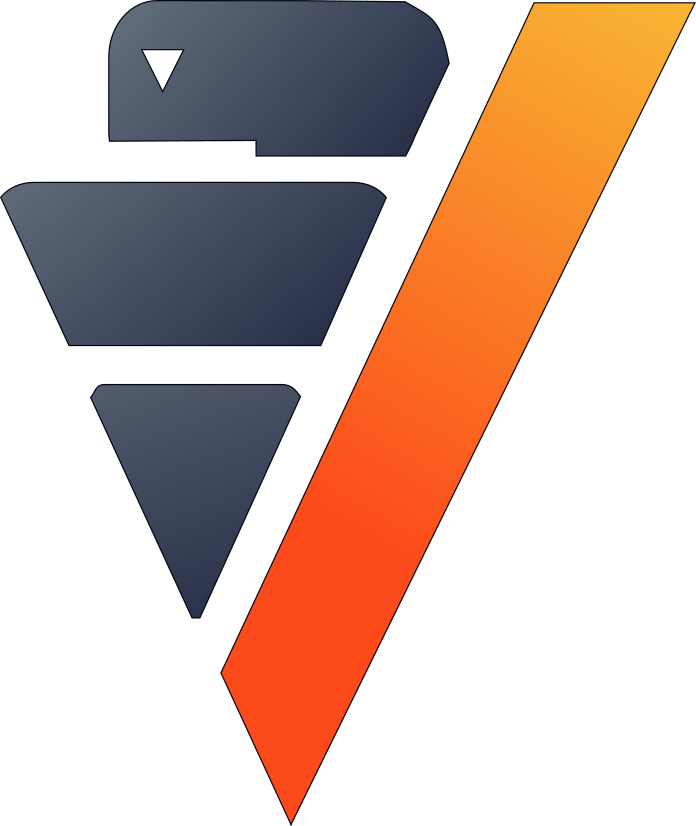

dateUTC    temperature    humidity  
1      2014-01-01 00:00:00           38.0        95.0  
2      2014-01-01 00:30:00           37.4        93.0  
3      2014-01-01 01:00:00           37.4       100.0  
4      2014-01-01 01:30:00           37.4       100.0  
5      2014-01-01 02:00:00           39.2        93.0  
6      2014-01-01 02:30:00           39.2        93.0  
7      2014-01-01 03:00:00           39.2        93.0  
8      2014-01-01 03:30:00           39.2        93.0  
9      2014-01-01 04:00:00           39.2        93.0  
10     2014-01-01 04:30:00           39.2        93.0  
11     2014-01-01 05:00:00           39.2        93.0  
12     2014-01-01 05:30:00           39.2        87.0  
13     2014-01-01 06:00:00           38.0        89.0  
14     2014-01-01 06:30:00           37.4        93.0  
15     2014-01-01 07:00:00           37.4        93.0  
16     2014-01-01 07:30:00           37.4        93.0  
17     2014-01-01 08:00:00           37.4        93.0  
18     2014-01-01 08:30:00           37.4        87.0  
19     2014-01-01 09:00:00           37.4        87.0  
20     2014-01-01 09:30:00           37.4        87.0  
21     2014-01-01 10:00:00           37.4        93.0  
22     2014-01-01 10:30:00           37.4        93.0  
23     2014-01-01 11:00:00           37.4        87.0  
24     2014-01-01 11:30:00           37.4        93.0  
25     2014-01-01 12:00:00           38.0        85.0  
26     2014-01-01 12:30:00           39.2        87.0  
27     2014-01-01 13:00:00           39.2        87.0  
28     2014-01-01 13:30:00           39.2        87.0  
29     2014-01-01 14:00:00           39.2        87.0  
30     2014-01-01 14:30:00           39.2        87.0  
31     2014-01-01 15:00:00           39.2        87.0  
32     2014-01-01 15:30:00           39.2        87.0  
33     2014-01-01 16:00:00           37.4        93.0  
34     2014-01-01 16:30:00           39.2        87.0  
35     2014-01-01 17:00:00           39.2        87.0  
36     2014-01-01 17:30:00           37.4        87.0  
37     2014-01-01 18:00:00           38.0        81.0  
38     2014-01-01 18:30:00           37.4        87.0  
39     2014-01-01 19:00:00           35.6        87.0  
40     2014-01-01 19:30:00           37.4        93.0  
41     2014-01-01 20:00:00           39.2        87.0  
42     2014-01-01 20:30:00           39.2        87.0  
43     2014-01-01 21:00:00           39.2        87.0  
44     2014-01-01 21:30:00           41.0        81.0  
45     2014-01-01 22:00:00           39.2        87.0  
46     2014-01-01 22:30:00           39.2        87.0  
47     2014-01-01 23:00:00           39.2        87.0  
48     2014-01-01 23:30:00           39.2        81.0  
49     2014-01-02 00:00:00           38.0        76.0  
50     2014-01-02 00:30:00           37.4        81.0  
51     2014-01-02 01:00:00           37.4        81.0  
52     2014-01-02 01:30:00           37.4        81.0  
53     2014-01-02 02:00:00           37.4        81.0  
54     2014-01-02 02:30:00           37.4        81.0  
55     2014-01-02 03:00:00           37.4        81.0  
56     2014-01-02 03:30:00           37.4        81.0  
57     2014-01-02 04:00:00           37.4        81.0  
58     2014-01-02 04:30:00           35.6        87.0  
59     2014-01-02 05:00:00           35.6        93.0  
60     2014-01-02 05:30:00           37.4        81.0  
61     2014-01-02 06:00:00           37.0        75.0  
62     2014-01-02 06:30:00           37.4        81.0  
63     2014-01-02 07:00:00           37.4        87.0  
64     2014-01-02 07:30:00           37.4        81.0  
65     2014-01-02 08:00:00           35.6        81.0  
66     2014-01-02 08:30:00           35.6        81.0  
67     2014-01-02 09:00:00           37.4        75.0  
68     2014-01-02 09:30:00           37.4        81.0  
69     2014-01-02 10:00:00           39.2        75.0  
70     2014-01-02 10:30:00           41.0        70.0  
71     2014-01-02 11:00:00           39.2  
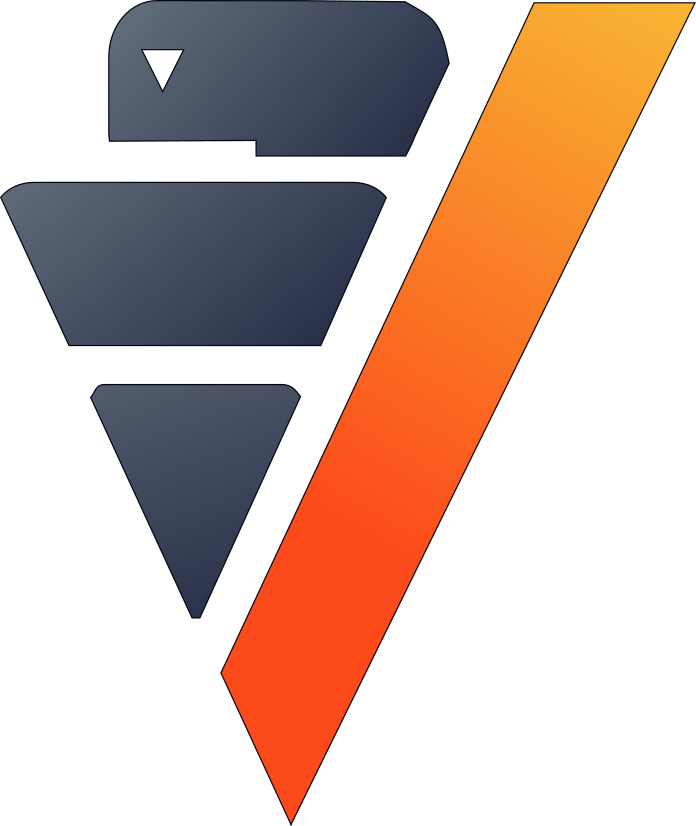

meterID    residenceType            latitude            longitude  
1            0                1    53.3575915882838    -6.27554509198069  
2            1                1    53.3130886440828    -6.21174062227953  
3            2                1     53.322863954253    -6.25885396251447  
4            3                3     51.895226209818    -8.54531304761961  
5            4                1    53.6511753623331    -6.69348712237822  
6            5                1    53.3262233045899    -6.31623713317817  
7            6                3    53.3816401612885    -6.24222877491921  
8            7                3    53.4410265504271     -6.2749868845315  
9            8                1    53.2883538726462    -6.31547263281076  
10           9                1     53.307294775666      -6.171585396401  
11          10                1    53.3043589304317    -6.27057231678352  
12          11                1    52.2168162005257    -7.19089306958349  
13          12                3    53.3292821225723    -6.26914988094354  
14          13                1    52.2330869136812     -7.0801397379672  
15          14                1    53.3121094759744     -6.1914301584486  
16          15                1    52.6815374444767    -8.71513846618087  
17          16                2    53.2598894923594    -8.98501096632971  
18          17                1    53.3386461784187    -6.19326209020707  
19          18                1    53.2930399359755    -6.29464811435931  
20          19                1    53.2904090932662    -6.20219801883112  
21          20                1    53.3140843911614    -6.27801544356096  
22          21                2    53.3368019275034    -6.30227460284837  
23          22                1    53.3606245053304    -6.25253082496436  
24          23                3    53.7334769562786    -6.40192964510675  
25          24                1    51.8904635261463     -8.4583653371337  
26          25                1    53.2943781673251    -6.27264309456447  
27          26                1    53.4252605572445    -6.24346657284835  
28          27                2    53.3445341131241    -6.21965121543182  
29          28                1     53.358289570405    -6.22902191315319  
30          29                1    51.9025419059901    -8.45522362503022  
31          30                3    53.4226787570522     -6.2597908055893  
32          31                3     53.379068564415    -6.25362478692152  
33          32                3    54.0078974821771    -6.36373099514602  
34          33                2    53.3786128724389    -6.26875699530572  
35          34                1    53.3276679292134    -6.25674968108046  
36          35                1    53.3775061858458     -6.2658589998757  
37          36                1     53.422378212805    -6.30085964886839  
38          37                2    53.3163882602178    -6.15806917577308  
39          38                3      53.37096469415    -6.27913717729599  
40          39                1    53.4132892637185    -6.23844413381297  
41          40                1    53.4228804497345    -6.26418479308435  
42          41                1     53.353488205755    -6.30562807207814  
43          42                1    53.3054854916401    -6.24275285029992  
44          43                1    53.3376504362861    -6.25709734131062  
45          44                1    53.3748180529522    -6.21375987196951  
46          45                1    53.7635143297958    -6.25548923165312  
47          46                1    53.2618719521814    -6.25472544269271  
48          47                3    51.8616597388643    -8.49342918637484  
49          48                3    53.2044437294531      -6.185303194865  
50          49                1    53.3679368733445    -6.23992423549581  
51          50                1    53.2659672891683    -6.26641539940328  
52          51                1    53.3662651408726    -6.14679963936097  
53          52                1 
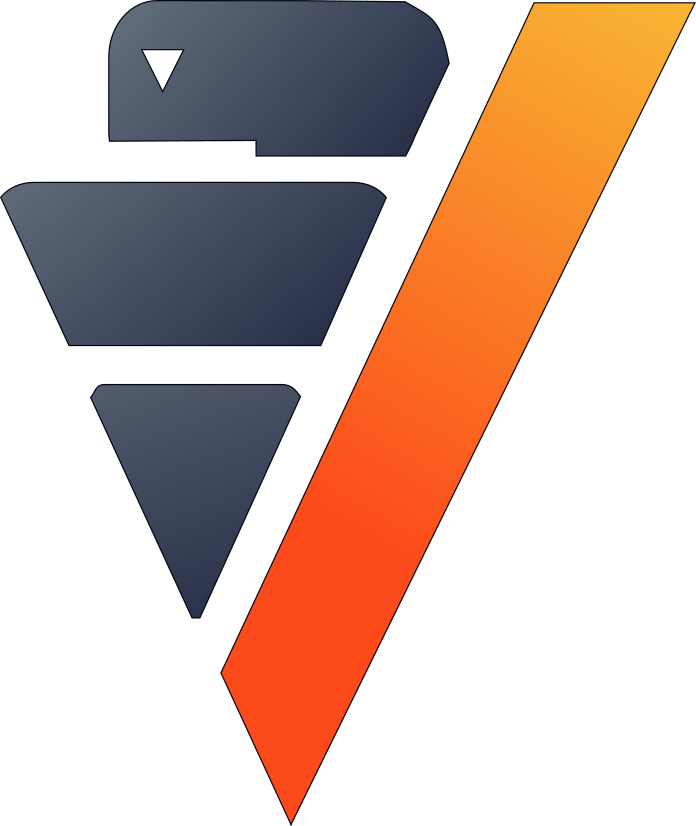

In [3]:
sm_consumption = vp.read_csv("data/smart_meters/sm_consumption.csv")
sm_weather = vp.read_csv("data/smart_meters/sm_weather.csv")
sm_meters = vp.read_csv("data/smart_meters/sm_meters.csv")
display(sm_consumption)
display(sm_weather)
display(sm_meters)

## Data Exploration and Preparation

Predicting energy consumption in households is very important. Surges in electricity use could cause serious power outages. In our case, we'll be using data on general household energy consumption in Ireland to predict consumption at various times.

In order to join the different data sources, we need to assume that the weather will be approximately the same across the entirety of Ireland. We'll use the date and time as the key to join 'sm_weather' and 'sm_consumption'.

<b>Joining different datasets with interpolation</b>

In VerticaPy, you can interpolate joins; Vertica will find the closest timestamp to the key and join the result.

dateUTC    meterID    value    humidity   \\
1      2014-01-01 00:00:00        913    0.097        95.0   \\
2      2014-01-01 00:00:00        895    0.184        95.0   \\
3      2014-01-01 00:00:00        795    0.093        95.0   \\
4      2014-01-01 00:00:00        780    0.116        95.0   \\
5      2014-01-01 00:00:00        747    0.559        95.0   \\
6      2014-01-01 00:00:00        660    0.836        95.0   \\
7      2014-01-01 00:00:00        640    1.796        95.0   \\
8      2014-01-01 00:00:00        605    0.038        95.0   \\
9      2014-01-01 00:00:00        484    0.211        95.0   \\
10     2014-01-01 00:00:00        474    0.313        95.0   \\
11     2014-01-01 00:00:00        457    0.022        95.0   \\
12     2014-01-01 00:00:00        371    0.815        95.0   \\
13     2014-01-01 00:00:00        355    0.448        95.0   \\
14     2014-01-01 00:00:00        348    0.071        95.0   \\
15     2014-01-01 00:00:00        307    1.423        95.0   \\
16     2014-01-01 00:00:00        188    0.152        95.0   \\
17     2014-01-01 00:00:00        181    0.138        95.0   \\
18     2014-01-01 00:00:00        179    0.033        95.0   \\
19     2014-01-01 00:00:00        129    0.054        95.0   \\
20     2014-01-01 00:00:00        116    0.232        95.0   \\
21     2014-01-01 00:15:00        986    0.301        95.0   \\
22     2014-01-01 00:15:00        848    0.186        95.0   \\
23     2014-01-01 00:15:00        829    0.145        95.0   \\
24     2014-01-01 00:15:00        718    0.091        95.0   \\
25     2014-01-01 00:15:00        637    0.319        95.0   \\
26     2014-01-01 00:15:00        625    0.141        95.0   \\
27     2014-01-01 00:15:00        619    0.103        95.0   \\
28     2014-01-01 00:15:00        583    4.081        95.0   \\
29     2014-01-01 00:15:00        444    0.131        95.0   \\
30     2014-01-01 00:15:00        221    0.399        95.0   \\
31     2014-01-01 00:15:00         67    0.157        95.0   \\
32     2014-01-01 00:15:00         52    0.157        95.0   \\
33     2014-01-01 00:30:00        933    0.061        93.0   \\
34     2014-01-01 00:30:00        930    0.202        93.0   \\
35     2014-01-01 00:30:00        904    0.159        93.0   \\
36     2014-01-01 00:30:00        829    0.082        93.0   \\
37     2014-01-01 00:30:00        796    0.237        93.0   \\
38     2014-01-01 00:30:00        663     0.08        93.0   \\
39     2014-01-01 00:30:00        628    1.246        93.0   \\
40     2014-01-01 00:30:00        626    0.106        93.0   \\
41     2014-01-01 00:30:00        618    0.067        93.0   \\
42     2014-01-01 00:30:00        506    0.108        93.0   \\
43     2014-01-01 00:30:00        497    0.144        93.0   \\
44     2014-01-01 00:30:00        460    0.094        93.0   \\
45     2014-01-01 00:30:00        376    0.129        93.0   \\
46     2014-01-01 00:30:00        332    0.044        93.0   \\
47     2014-01-01 00:30:00        308    0.045        93.0   \\
48     2014-01-01 00:30:00        286    0.209        93.0   \\
49     2014-01-01 00:30:00        277    0.287        93.0   \\
50     2014-01-01 00:30:00        264    0.162        93.0   \\
51     2014-01-01 00:30:00        138    2.276        93.0   \\
52     2014-01-01 00:30:00         90    0.183        93.0   \\
53     2014-01-01 00:45:00        977    0.176        93.0   \\
54     2014-01-01 00:45:00        937    0.201        93.0   \\
55     2014-01-01 00:45:00        927    0.551        93.0   \\
56     2014-01-01 00:45:00        867    0.844        93.0   \\
57     2014-01-01 00:45:00        762     0.13        93.0   \\
58     2014-01-01 00:45:00        528    0.067        93.0   \\
59     2014-01-01 00:45:00        447    0.599        93.0   \\
60     2014-01-01 00:45:00        375    0.519        93.0   \\
61     2014-01-01 00:45:00        297    0.609        93.0   \\
62     2014-01-01 00:45:00        250    0.428     
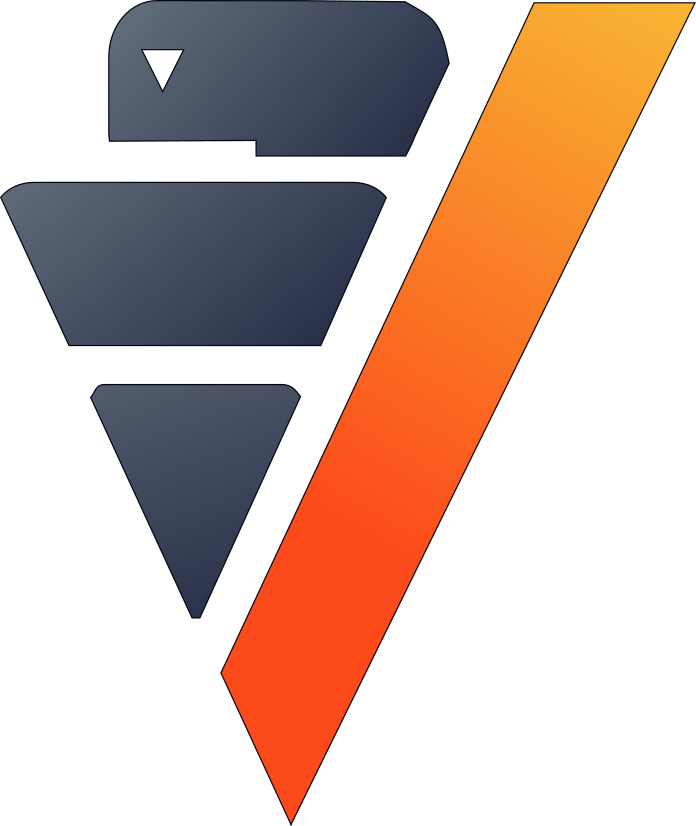

In [4]:
sm_consumption_weather = sm_consumption.join(
                            sm_weather,
                            how = "left",
                            on_interpolate = {"dateUTC": "dateUTC"},
                            expr1 = ["dateUTC", "meterID", "value"],
                            expr2 = ["humidity", "temperature"])
display(sm_consumption_weather)

<b>Segmenting Latitude & Longitude using Clustering</b>

The dataset 'sm_meters' is pretty important. In particular, the type of residence is probably a good predictor for electricity usage. We can create clusters of the different regions with k-means clustering based on longitude and latitude. Let's find the most suitable 'k' using an elbow curve and scatter plot.

min                  max  
"meterID"                          0.0                999.0  
"residenceType"                    1.0                  3.0  
"latitude"            51.7964600770212     54.0270361317983  
"longitude"          -9.16352332036362    -6.07134572494937  
Rows: 1-4 | Columns: 3
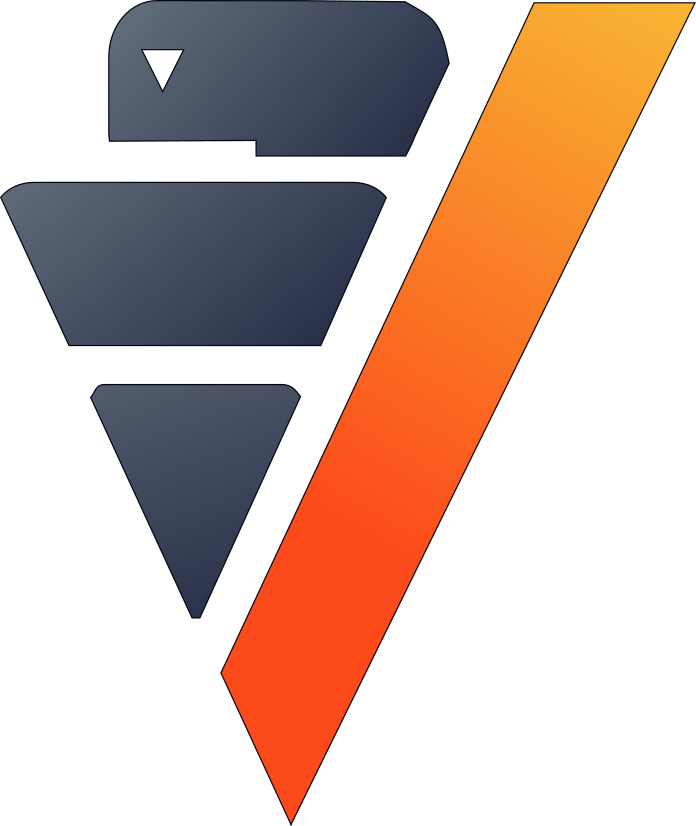

In [5]:
sm_meters.agg(["min", "max"])

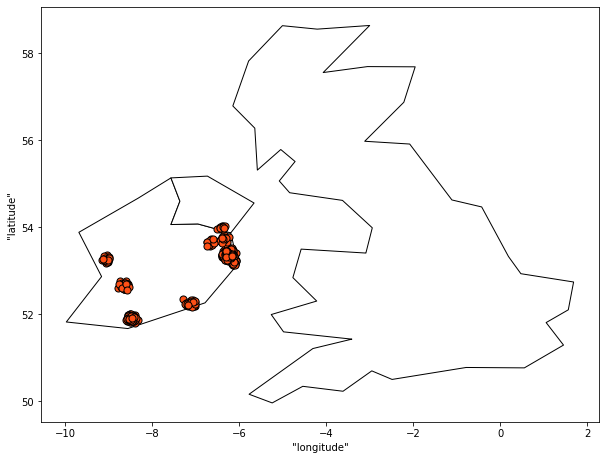

In [6]:
%matplotlib inline
from verticapy.learn.model_selection import elbow
from verticapy.datasets import load_world

world = load_world()
df = world.to_geopandas(geometry = "geometry")
df = df[df["country"].isin(["Ireland", "United Kingdom"])]
ax = df.plot(edgecolor = "black",
             color = "white",
             figsize = (10, 9))
ax = sm_meters.scatter(["longitude", "latitude"], ax = ax)

Based on the scatter plot, five seems like the optimal number of clusters. Let's verify this hypothesis using an elbow curve.

Within-Cluster SS  
3          0.9311388771341764  
4           0.975099232332047  
5          0.9844977831351884  
6           0.993627480208735  
7          0.9947041356087959  
Rows: 1-5 | Columns: 2
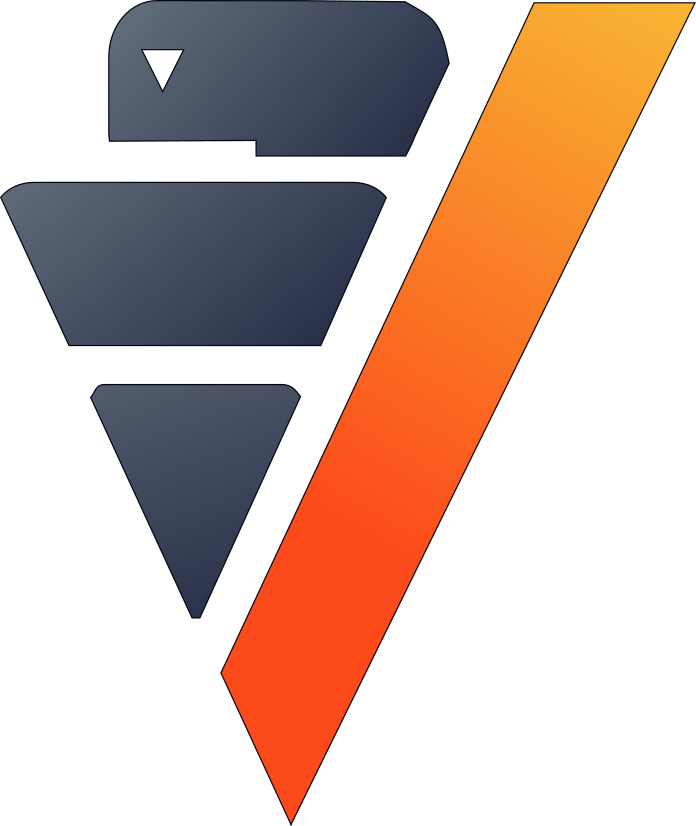

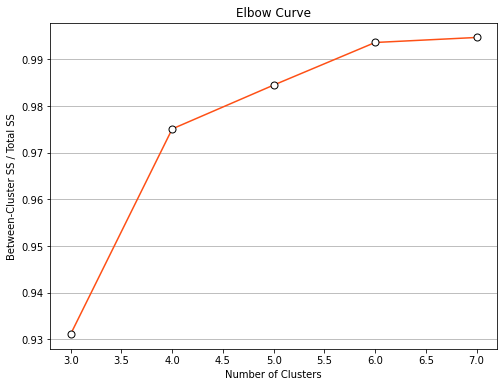

In [7]:
elbow(sm_meters, ["longitude", "latitude"], n_cluster = (3, 8))

The elbow curve seems to confirm that five is the optimal number of clusters, so let's create a k-means model with that in mind.

In [8]:
from verticapy.learn.cluster import KMeans
model = KMeans("kmeans_sm_regions", 
               n_cluster = 5,
               init = [(-6.26980, 53.38127),
                       (-9.06178, 53.25998),
                       (-8.48641, 51.90216),
                       (-7.12408, 52.24610),
                       (-8.63985, 52.65945),])
model.drop()
model.fit(sm_meters, 
          ["longitude", "latitude"])



centers
longitude|latitude
---------+--------
-9.06178 |53.25998
-8.63985 |52.65945
-8.48641 |51.90216
-7.12408 |52.24610
-6.26980 |53.38127


metrics
Evaluation metrics:
     Total Sum of Squares: 1209.2077
     Within-Cluster Sum of Squares: 
         Cluster 0: 0.099754154
         Cluster 1: 0.2779225
         Cluster 2: 0.53464463
         Cluster 3: 0.2657853
         Cluster 4: 17.892423
     Total Within-Cluster Sum of Squares: 19.07053
     Between-Cluster Sum of Squares: 1190.1372
     Between-Cluster SS / Total SS: 98.42%
 Number of iterations performed: 1
 Converged: True
 Call:
kmeans('public.kmeans_sm_regions', '"public"."_verticapy_tmp_view_dbadmin_239726_1781523806_"', '"longitude", "latitude"', 5
USING PARAMETERS max_iterations=300, epsilon=0.0001, initial_centers_table='"public"."_verticapy_tmp_kmeans_init_dbadmin_239726_3848320059_"', distance_method='euclidean')

Let's add our clusters to the vDataFrame.

In [9]:
sm_meters = model.predict(sm_meters, name = "region")

Let's draw a scatter plot of the different regions.

<AxesSubplot:xlabel='"longitude"', ylabel='"latitude"'>

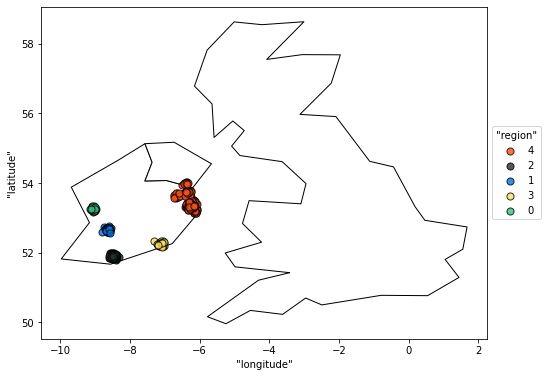

In [10]:
ax = df.plot(edgecolor = "black",
             color = "white",
             figsize = (10, 9))
sm_meters.scatter(["longitude", "latitude"], 
                  catcol = "region",
                  max_cardinality = 10,
                  ax = ax)

<b>Dataset Enrichment</b>

Let's join 'sm_meters' with 'sm_consumption_weather'.

dateUTC    meterID    value    humidity   \\
1      2014-01-01 00:00:00        913    0.097        95.0   \\
2      2014-01-01 00:00:00        895    0.184        95.0   \\
3      2014-01-01 00:00:00        795    0.093        95.0   \\
4      2014-01-01 00:00:00        780    0.116        95.0   \\
5      2014-01-01 00:00:00        747    0.559        95.0   \\
6      2014-01-01 00:00:00        660    0.836        95.0   \\
7      2014-01-01 00:00:00        640    1.796        95.0   \\
8      2014-01-01 00:00:00        605    0.038        95.0   \\
9      2014-01-01 00:00:00        484    0.211        95.0   \\
10     2014-01-01 00:00:00        474    0.313        95.0   \\
11     2014-01-01 00:00:00        457    0.022        95.0   \\
12     2014-01-01 00:00:00        371    0.815        95.0   \\
13     2014-01-01 00:00:00        355    0.448        95.0   \\
14     2014-01-01 00:00:00        348    0.071        95.0   \\
15     2014-01-01 00:00:00        307    1.423        95.0   \\
16     2014-01-01 00:00:00        188    0.152        95.0   \\
17     2014-01-01 00:00:00        181    0.138        95.0   \\
18     2014-01-01 00:00:00        179    0.033        95.0   \\
19     2014-01-01 00:00:00        129    0.054        95.0   \\
20     2014-01-01 00:00:00        116    0.232        95.0   \\
21     2014-01-01 00:15:00        986    0.301        95.0   \\
22     2014-01-01 00:15:00        848    0.186        95.0   \\
23     2014-01-01 00:15:00        829    0.145        95.0   \\
24     2014-01-01 00:15:00        718    0.091        95.0   \\
25     2014-01-01 00:15:00        637    0.319        95.0   \\
26     2014-01-01 00:15:00        625    0.141        95.0   \\
27     2014-01-01 00:15:00        619    0.103        95.0   \\
28     2014-01-01 00:15:00        583    4.081        95.0   \\
29     2014-01-01 00:15:00        444    0.131        95.0   \\
30     2014-01-01 00:15:00        221    0.399        95.0   \\
31     2014-01-01 00:15:00         67    0.157        95.0   \\
32     2014-01-01 00:15:00         52    0.157        95.0   \\
33     2014-01-01 00:30:00        933    0.061        93.0   \\
34     2014-01-01 00:30:00        930    0.202        93.0   \\
35     2014-01-01 00:30:00        904    0.159        93.0   \\
36     2014-01-01 00:30:00        829    0.082        93.0   \\
37     2014-01-01 00:30:00        796    0.237        93.0   \\
38     2014-01-01 00:30:00        663     0.08        93.0   \\
39     2014-01-01 00:30:00        628    1.246        93.0   \\
40     2014-01-01 00:30:00        626    0.106        93.0   \\
41     2014-01-01 00:30:00        618    0.067        93.0   \\
42     2014-01-01 00:30:00        506    0.108        93.0   \\
43     2014-01-01 00:30:00        497    0.144        93.0   \\
44     2014-01-01 00:30:00        460    0.094        93.0   \\
45     2014-01-01 00:30:00        376    0.129        93.0   \\
46     2014-01-01 00:30:00        332    0.044        93.0   \\
47     2014-01-01 00:30:00        308    0.045        93.0   \\
48     2014-01-01 00:30:00        286    0.209        93.0   \\
49     2014-01-01 00:30:00        277    0.287        93.0   \\
50     2014-01-01 00:30:00        264    0.162        93.0   \\
51     2014-01-01 00:30:00        138    2.276        93.0   \\
52     2014-01-01 00:30:00         90    0.183        93.0   \\
53     2014-01-01 00:45:00        977    0.176        93.0   \\
54     2014-01-01 00:45:00        937    0.201        93.0   \\
55     2014-01-01 00:45:00        927    0.551        93.0   \\
56     2014-01-01 00:45:00        867    0.844        93.0   \\
57     2014-01-01 00:45:00        762     0.13        93.0   \\
58     2014-01-01 00:45:00        528    0.067        93.0   \\
59     2014-01-01 00:45:00        447    0.599        93.0   \\
60     2014-01-01 00:45:00        375    0.519        93.0   \\
61     2014-01-01 00:45:00        297    0.609        93.0   \\
62     2014-01-01 00:45:00        250    0.428     
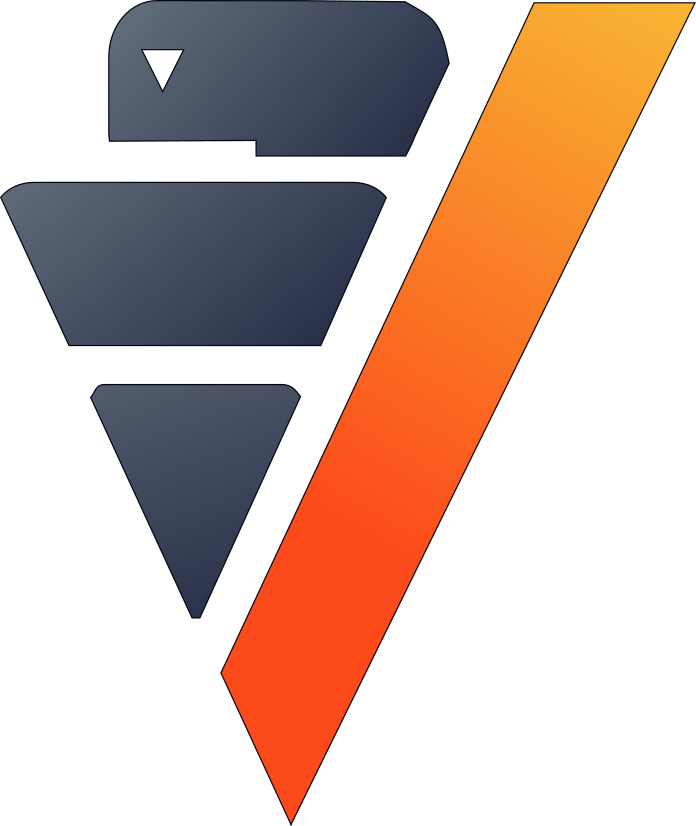

In [11]:
sm_consumption_weather_region = sm_consumption_weather.join(
                                    sm_meters,
                                    how = "natural",
                                    expr1 = ["*"],
                                    expr2 = ["residenceType", 
                                             "region"])
display(sm_consumption_weather_region)

<b>Handling Missing Values</b>

Let's take care of our missing values.

count    percent  
"dateUTC"            1188432.0      100.0  
"meterID"            1188432.0      100.0  
"humidity"           1188432.0      100.0  
"temperature"        1188432.0      100.0  
"residenceType"      1188432.0      100.0  
"region"             1188432.0      100.0  
"value"              1188412.0     99.998  
Rows: 1-7 | Columns: 3
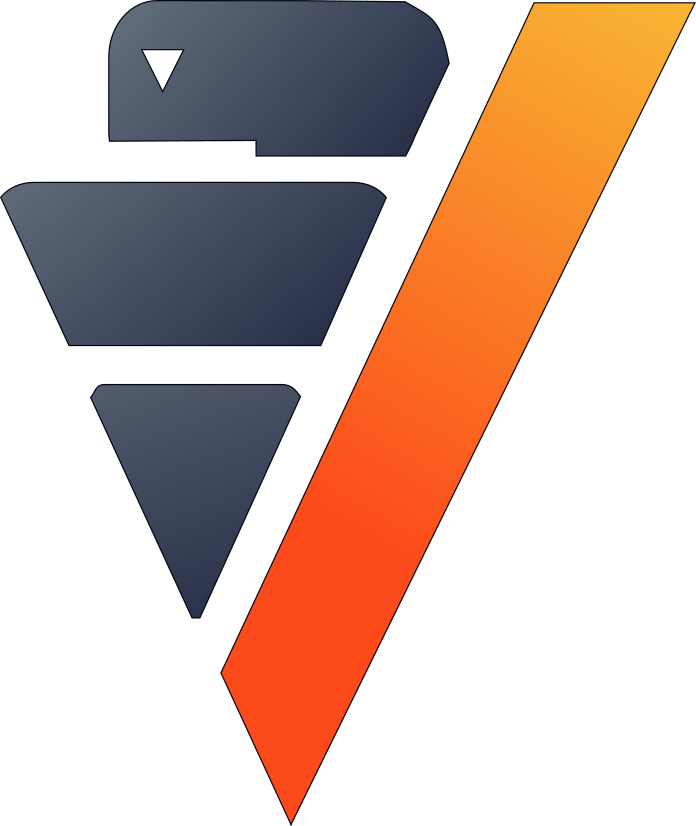

In [12]:
sm_consumption_weather_region.count_percent()

The variable 'value' has a few missing values that we can drop.

20 elements were filtered.


count  
"dateUTC"            1188412.0  
"meterID"            1188412.0  
"value"              1188412.0  
"humidity"           1188412.0  
"temperature"        1188412.0  
"residenceType"      1188412.0  
"region"             1188412.0  
Rows: 1-7 | Columns: 2
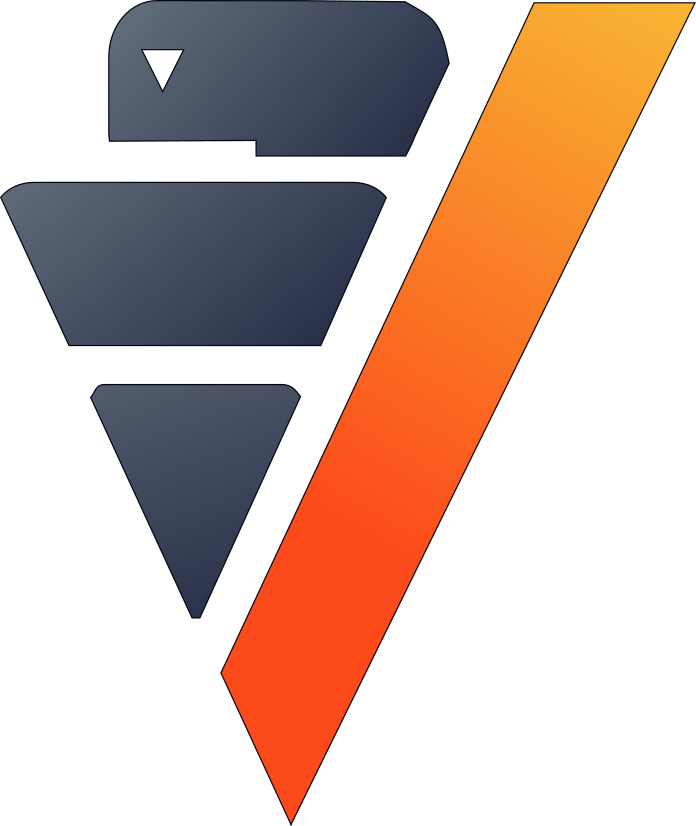

In [13]:
sm_consumption_weather_region["value"].dropna()
sm_consumption_weather_region.count()

<b>Interpolation & Aggregations</b>

Since power outages seem relatively common in each area, and the "value" represents the electricity consumed during 30 minute intervals (in kWh),  it'd be a good idea to interpolate and aggregate the data to get a monthly average in electricity consumption per region.

Let's save our new dataset in the Vertica database.

In [15]:
vp.drop("sm_consumption_weather_region", method = "table")
sm_consumption_weather_region.to_db("sm_consumption_weather_region",
                                    relation_type = "table")
sm_consumption_weather_region_clean = vp.vDataFrame("sm_consumption_weather_region")

To get an equally-sliced dataset, we can then interpolate to fill any gaps. This operation is essential for creating correct time series models.

dateUTC    meterID                 value            humidity   \\
1      2014-01-01 11:00:00          0                 0.029                87.0   \\
2      2014-01-01 11:30:00          0    0.0740909090909091                87.0   \\
3      2014-01-01 12:00:00          0     0.119181818181818                87.0   \\
4      2014-01-01 12:30:00          0     0.164272727272727                87.0   \\
5      2014-01-01 13:00:00          0     0.209363636363636                87.0   \\
6      2014-01-01 13:30:00          0     0.254454545454545                87.0   \\
7      2014-01-01 14:00:00          0      0.27752380952381    86.7976190476191   \\
8      2014-01-01 14:30:00          0     0.278571428571429    86.3928571428571   \\
9      2014-01-01 15:00:00          0     0.279619047619048    85.9880952380952   \\
10     2014-01-01 15:30:00          0     0.280666666666667    85.5833333333333   \\
11     2014-01-01 16:00:00          0     0.281714285714286    85.1785714285714   \\
12     2014-01-01 16:30:00          0     0.282761904761905    84.7738095238095   \\
13     2014-01-01 17:00:00          0     0.283809523809524    84.3690476190476   \\
14     2014-01-01 17:30:00          0     0.284857142857143    83.9642857142857   \\
15     2014-01-01 18:00:00          0     0.285904761904762    83.5595238095238   \\
16     2014-01-01 18:30:00          0     0.286952380952381    83.1547619047619   \\
17     2014-01-01 19:00:00          0                 0.288               82.75   \\
18     2014-01-01 19:30:00          0     0.289047619047619    82.3452380952381   \\
19     2014-01-01 20:00:00          0     0.290095238095238    81.9404761904762   \\
20     2014-01-01 20:30:00          0     0.291142857142857    81.5357142857143   \\
21     2014-01-01 21:00:00          0     0.292190476190476    81.1309523809524   \\
22     2014-01-01 21:30:00          0     0.293238095238095    80.7261904761905   \\
23     2014-01-01 22:00:00          0     0.294285714285714    80.3214285714286   \\
24     2014-01-01 22:30:00          0     0.295333333333333    79.9166666666667   \\
25     2014-01-01 23:00:00          0     0.296380952380952    79.5119047619048   \\
26     2014-01-01 23:30:00          0     0.297428571428571    79.1071428571429   \\
27     2014-01-02 00:00:00          0     0.298476190476191    78.7023809523809   \\
28     2014-01-02 00:30:00          0      0.29952380952381    78.2976190476191   \\
29     2014-01-02 01:00:00          0     0.300571428571429    77.8928571428571   \\
30     2014-01-02 01:30:00          0     0.301619047619048    77.4880952380952   \\
31     2014-01-02 02:00:00          0     0.302666666666667    77.0833333333333   \\
32     2014-01-02 02:30:00          0     0.303714285714286    76.6785714285714   \\
33     2014-01-02 03:00:00          0     0.304761904761905    76.2738095238095   \\
34     2014-01-02 03:30:00          0     0.305809523809524    75.8690476190476   \\
35     2014-01-02 04:00:00          0     0.306857142857143    75.4642857142857   \\
36     2014-01-02 04:30:00          0     0.307904761904762    75.0595238095238   \\
37     2014-01-02 05:00:00          0     0.308952380952381    74.6547619047619   \\
38     2014-01-02 05:30:00          0                  0.31               74.25   \\
39     2014-01-02 06:00:00          0     0.311047619047619    73.8452380952381   \\
40     2014-01-02 06:30:00          0     0.312095238095238    73.4404761904762   \\
41     2014-01-02 07:00:00          0     0.313142857142857    73.0357142857143   \\
42     2014-01-02 07:30:00          0     0.314190476190476    72.6309523809524   \\
43     2014-01-02 08:00:00          0     0.315238095238095    72.2261904761905   \\
44     2014-01-02 08:30:00          0     0.316285714285714    71.8214285714286   \\
45     2014-01-02 09:00:00          0     0.317333333333333    71.4166666666667   \\
46     2014-01-02 09:30:00          0     0.318380952380952    71.0119047619048   \\
47     2014-01-02 10:00:
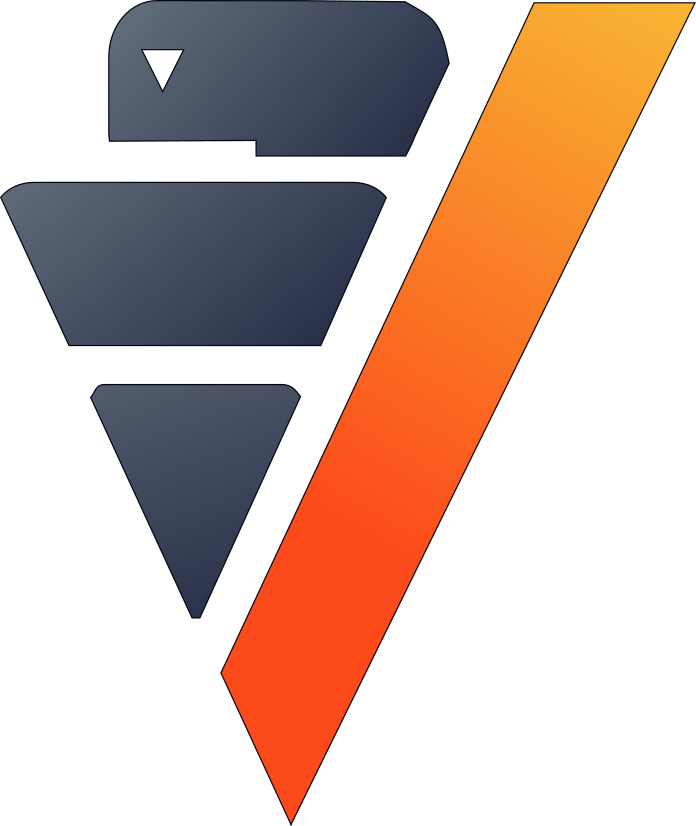

In [16]:
sm_consumption_weather_region_clean = sm_consumption_weather_region_clean.interpolate(
                                                                        ts = "dateUTC",
                                                                        rule = "30 minutes",
                                                                        method = {"value": "linear",
                                                                                  "humidity": "linear",
                                                                                  "temperature": "linear",
                                                                                  "residenceType": "ffill",
                                                                                  "region": "ffill"},
                                                                        by = ["meterID"])
display(sm_consumption_weather_region_clean)

Let's aggregate the data to figure out the monthly energy consumption for each smart meter. We can then save the result in the Vertica database.

meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2      None             None        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2014-01-01 00:00:00   \\
43           2         4                1        1    2015-01-01 00:00:00   \\
44           2         4                1        2    2014-02-01 00:00:00   \\
45           2         4                1        2    2015-02-01 00:00:00   \\
46           2         4                1        3    2014-03-01 00:00:00   \\
47           2         4                1        3    2015-03-01 00:00:00   \\
48           2         4                1        4    2014-04-01 00:00:00   \\
49           2         4                1        4    2015-04-01 00:00:00   \\
50           2         4                1        5    201
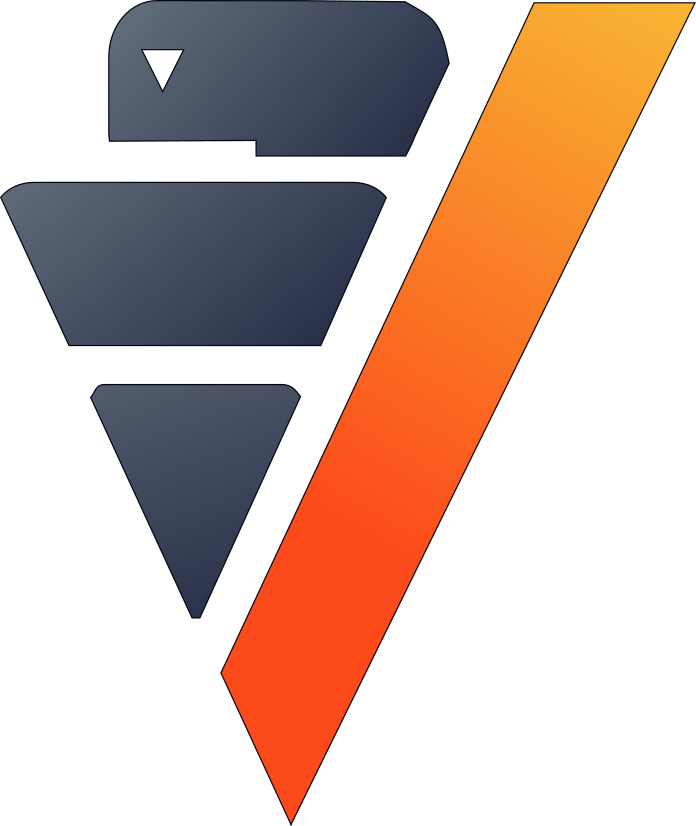

In [18]:
import verticapy.stats as st
sm_consumption_month = sm_consumption_weather_region_clean.groupby(
                    columns = ["meterID",
                               "region", 
                               "residenceType",
                               "MONTH(dateUTC) AS month",
                               "DATE_TRUNC('MONTH', dateUTC::date) AS date_month"],
                    expr = [st.sum(sm_consumption_weather_region["value"])._as("value"),
                            st.avg(sm_consumption_weather_region["temperature"])._as("avg_temperature"),
                            st.avg(sm_consumption_weather_region["humidity"])._as("avg_humidity")]).filter(
                                                                                    "date_month < '2015-09-01'")
vp.drop("sm_consumption_month", method = "table")
sm_consumption_month.to_db("sm_consumption_month",
                           relation_type = "table",
                           inplace = True)

<b>Understanding the Data & Detecting Outliers</b>

Looking at three different smart meters, we can see a clear decrease in energy consumption during the summer followed by a sharp increase in the winter.

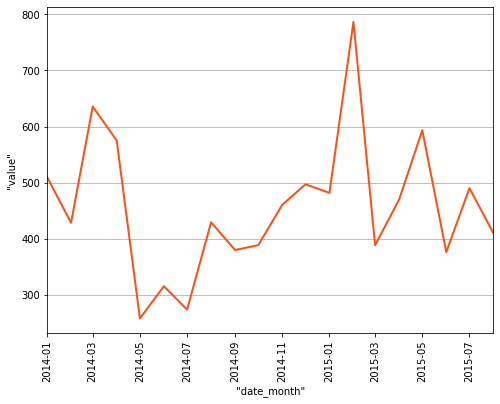

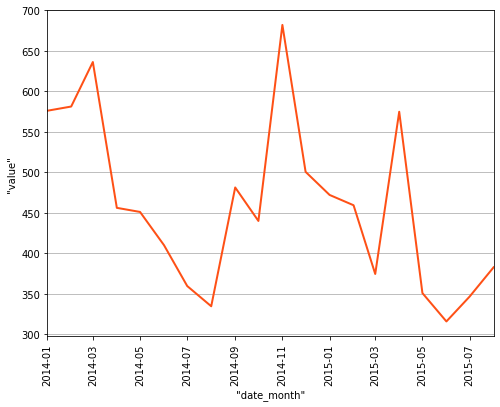

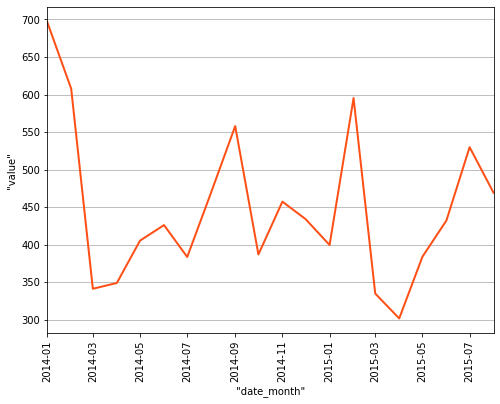

In [19]:
for i in [10, 12, 14]:
    sm_consumption_month[sm_consumption_month["meterID"] == i]["value"].plot(ts = "date_month")

This behavior seems to be seasonal, but we don't have enough data to prove this.

Let's find outliers in the distribution by computing the ZSCORE per meterID.

meterID    region    residenceType    month             date_month   \\
1        364         2                1       12    2014-12-01 00:00:00   \\
2        399         4                1       10    2014-10-01 00:00:00   \\
3        809         4                1       11    2014-11-01 00:00:00   \\
4        951         4                1        4    2015-04-01 00:00:00   \\
                value     avg_temperature        avg_humidity   \\
1    1852.04580636529    39.2305333549752    89.9652523028262   \\
2    1589.23770463456    52.7068558110441    88.7730360914782   \\
3    1300.55731708241    45.5709955755231    86.4715802984117   \\
4    2128.45466198574      48.16211775914    73.6313461768108   \\
         value_zscore  
1    4.00855200430863  
2    4.07298404322647  
3     4.0151606376986  
4    4.01829822269677  
Rows: 1-4 | Columns: 9
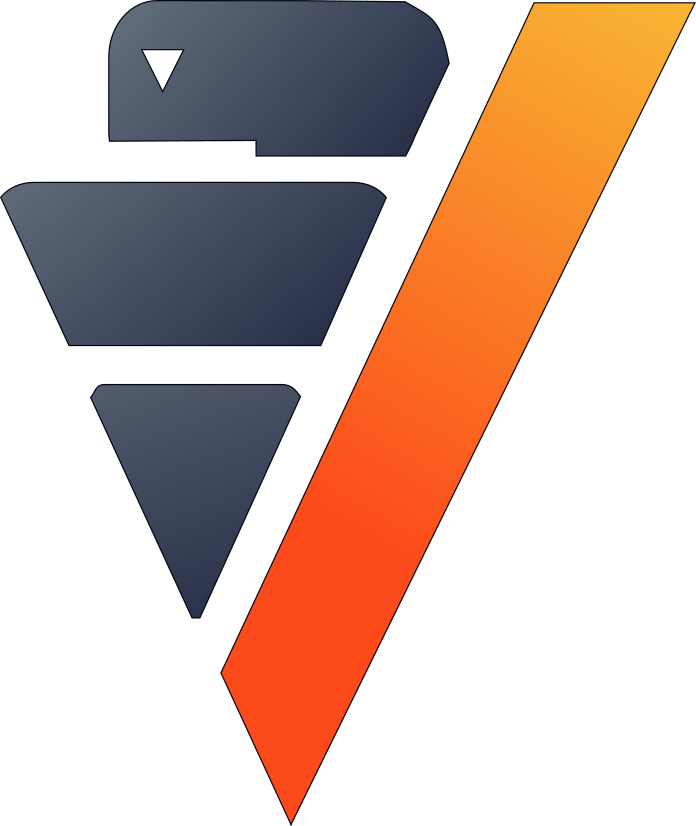

In [20]:
std = st.std(sm_consumption_month["value"])._over(by = [sm_consumption_month["meterID"]])
avg = st.avg(sm_consumption_month["value"])._over(by = [sm_consumption_month["meterID"]])
sm_consumption_month["value_zscore"] = (sm_consumption_month["value"] - avg) / std
sm_consumption_month.search("value_zscore > 4")

Four smart meters are outliers in energy consumption. We'll need to investigate to get more information.

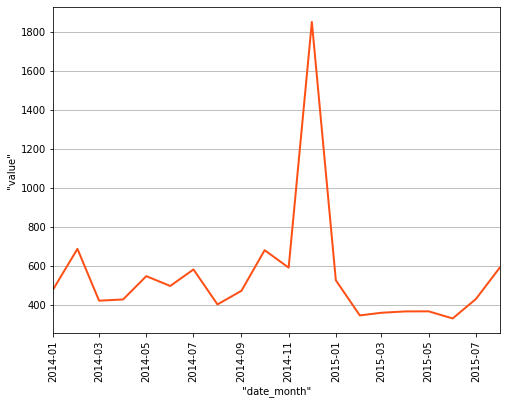

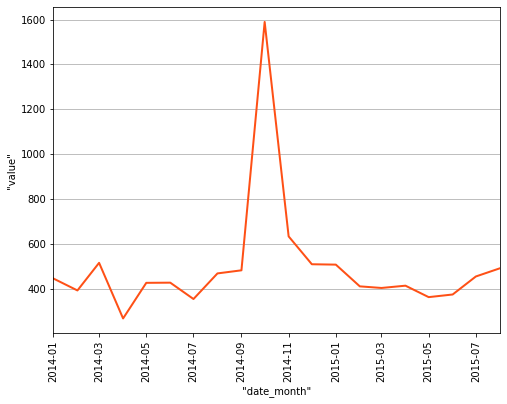

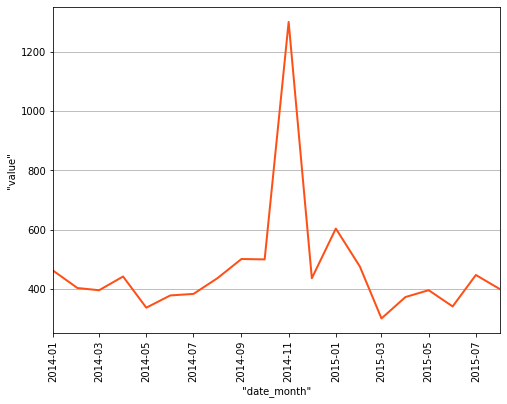

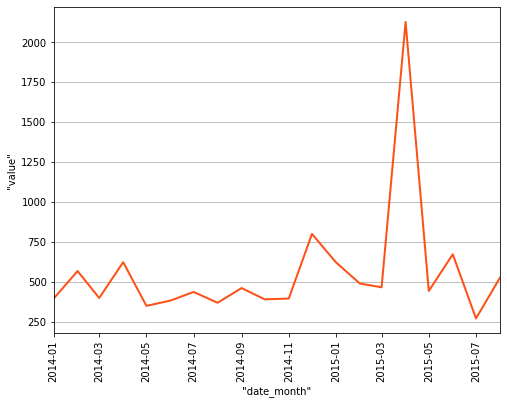

In [21]:
for i in [364, 399, 809, 951]:
    sm_consumption_month[sm_consumption_month["meterID"] == i]["value"].plot(ts = "date_month")

<b>Data Encoding & Bivariate Analysis</b>

Since most of our data is categorical, let's encode them with One-hot encoding. We can then examine the correlations between the various categories.

meterID    region    residenceType    month             date_month   \\
1            0         4                1        1    2014-01-01 00:00:00   \\
2            0         4                1        1    2015-01-01 00:00:00   \\
3            0         4                1        2    2014-02-01 00:00:00   \\
4            0         4                1        2    2015-02-01 00:00:00   \\
5            0         4                1        3    2014-03-01 00:00:00   \\
6            0         4                1        3    2015-03-01 00:00:00   \\
7            0         4                1        4    2014-04-01 00:00:00   \\
8            0         4                1        4    2015-04-01 00:00:00   \\
9            0         4                1        5    2014-05-01 00:00:00   \\
10           0         4                1        5    2015-05-01 00:00:00   \\
11           0         4                1        6    2014-06-01 00:00:00   \\
12           0         4                1        6    2015-06-01 00:00:00   \\
13           0         4                1        7    2014-07-01 00:00:00   \\
14           0         4                1        7    2015-07-01 00:00:00   \\
15           0         4                1        8    2014-08-01 00:00:00   \\
16           0         4                1        8    2015-08-01 00:00:00   \\
17           0         4                1        9    2014-09-01 00:00:00   \\
18           0         4                1       10    2014-10-01 00:00:00   \\
19           0         4                1       11    2014-11-01 00:00:00   \\
20           0         4                1       12    2014-12-01 00:00:00   \\
21           1         4                1        1    2014-01-01 00:00:00   \\
22           1         4                1        1    2015-01-01 00:00:00   \\
23           1         4                1        2    2014-02-01 00:00:00   \\
24           1         4                1        2    2015-02-01 00:00:00   \\
25           1         4                1        3    2014-03-01 00:00:00   \\
26           1         4                1        3    2015-03-01 00:00:00   \\
27           1         4                1        4    2014-04-01 00:00:00   \\
28           1         4                1        4    2015-04-01 00:00:00   \\
29           1         4                1        5    2014-05-01 00:00:00   \\
30           1         4                1        5    2015-05-01 00:00:00   \\
31           1         4                1        6    2014-06-01 00:00:00   \\
32           1         4                1        6    2015-06-01 00:00:00   \\
33           1         4                1        7    2014-07-01 00:00:00   \\
34           1         4                1        7    2015-07-01 00:00:00   \\
35           1         4                1        8    2014-08-01 00:00:00   \\
36           1         4                1        8    2015-08-01 00:00:00   \\
37           1         4                1        9    2014-09-01 00:00:00   \\
38           1         4                1       10    2014-10-01 00:00:00   \\
39           1         4                1       11    2014-11-01 00:00:00   \\
40           1         4                1       12    2014-12-01 00:00:00   \\
41           2      None             None        1    2014-01-01 00:00:00   \\
42           2         4                1        1    2014-01-01 00:00:00   \\
43           2         4                1        1    2015-01-01 00:00:00   \\
44           2         4                1        2    2014-02-01 00:00:00   \\
45           2         4                1        2    2015-02-01 00:00:00   \\
46           2         4                1        3    2014-03-01 00:00:00   \\
47           2         4                1        3    2015-03-01 00:00:00   \\
48           2         4                1        4    2014-04-01 00:00:00   \\
49           2         4                1        4    2015-04-01 00:00:00   \\
50           2         4                1        5    201
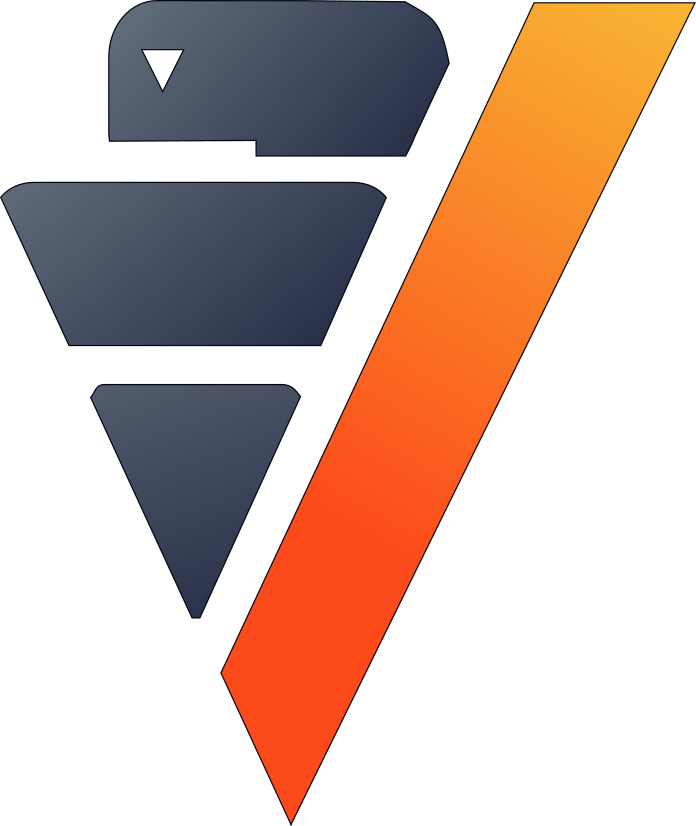

In [22]:
sm_consumption_month = sm_consumption_month.one_hot_encode(["region", "residenceType", "month"], 
                                                           drop_first = False,
                                                           max_cardinality = 20)
display(sm_consumption_month)

Let's compute the Pearson correlation matrix.

"meterID"                 "region"          "residenceType"   \\
"meterID"                                1.0      -0.0383154119269016       0.0980146907774023   \\
"region"                 -0.0383154119269016                      1.0       0.0166975561248509   \\
"residenceType"           0.0980146907774023       0.0166975561248509                      1.0   \\
"month"                -0.000958239223703914                      0.0                      0.0   \\
"value"                 0.000429585019171308      0.00391838085849298     -0.00058821325675922   \\
"avg_temperature"      -0.000388408483331499     0.000771742974758161    -0.000214800019030768   \\
"avg_humidity"          -0.00036832764708373     -0.00217981408380471      0.00183889966163093   \\
"value_zscore"         -6.06712073807718e-18    -3.74313875208588e-18    -6.57284327067527e-18   \\
"region_0"                    0.013651309137       -0.564373811092644     -0.00435561722873074   \\
"region_1"                0.0466265869557577       -0.539485038229266      0.00168175653142086   \\
"region_2"               0.00328987359897663       -0.474356114920355     -0.00460956649743866   \\
"region_3"                -0.013700995176311      -0.0850796152695257      -0.0623601449658743   \\
"region_4"               -0.0265760464510187        0.907172644025799       0.0350513980015978   \\
"residenceType_1"         -0.102365768266218      -0.0310062198052858       -0.964066970378623   \\
"residenceType_2"         0.0467577567557462       0.0574944611713134       0.0987873344174206   \\
"residenceType_3"         0.0816737879786041     0.000324658415336287        0.960040414014256   \\
"month_1"                0.00182472281671094                      0.0                      0.0   \\
"month_2"              -0.000222116232717449                      0.0                      0.0   \\
"month_3"              -0.000222116232717449                      0.0                      0.0   \\
"month_4"              -0.000222116232717449                      0.0                      0.0   \\
"month_5"              -0.000222116232717449                      0.0                      0.0   \\
"month_6"              -0.000222116232717449                      0.0                      0.0   \\
"month_7"              -0.000222116232717449                      0.0                      0.0   \\
"month_8"              -0.000222116232717449                      0.0                      0.0   \\
"month_9"              -0.000152971646153471                      0.0                      0.0   \\
"month_10"             -0.000152971646153471                      0.0                      0.0   \\
"month_11"             -0.000152971646153471                      0.0                      0.0   \\
"month_12"             -0.000152971646153471                      0.0                      0.0   \\
                                     "month"                  "value"        "avg_temperature"   \\
"meterID"              -0.000958239223703914     0.000429585019171308    -0.000388408483331499   \\
"region"                                 0.0      0.00391838085849298     0.000771742974758161   \\
"residenceType"                          0.0     -0.00058821325675922    -0.000214800019030768   \\
"month"                                  1.0      -0.0631050387695357        0.469805916060245   \\
"value"                  -0.0631050387695357                      1.0       -0.286002119828714   \\
"avg_temperature"          0.469805916060245       -0.286002119828714                      1.0   \\
"avg_humidity"           -0.0101794307863282        0.226840366290784       -0.658481080773544   \\
"value_zscore"           -0.0673472424493425        0.934346221805581       -0.309447511959112   \\
"region_0"               0.00589382858218876     -0.00416924243520411    -0.000725793447764298   \\
"region_1"                0.0079672351655185     -0.00382241121967591    -0.000488976526300037   \\
"region_2"                0.0119564
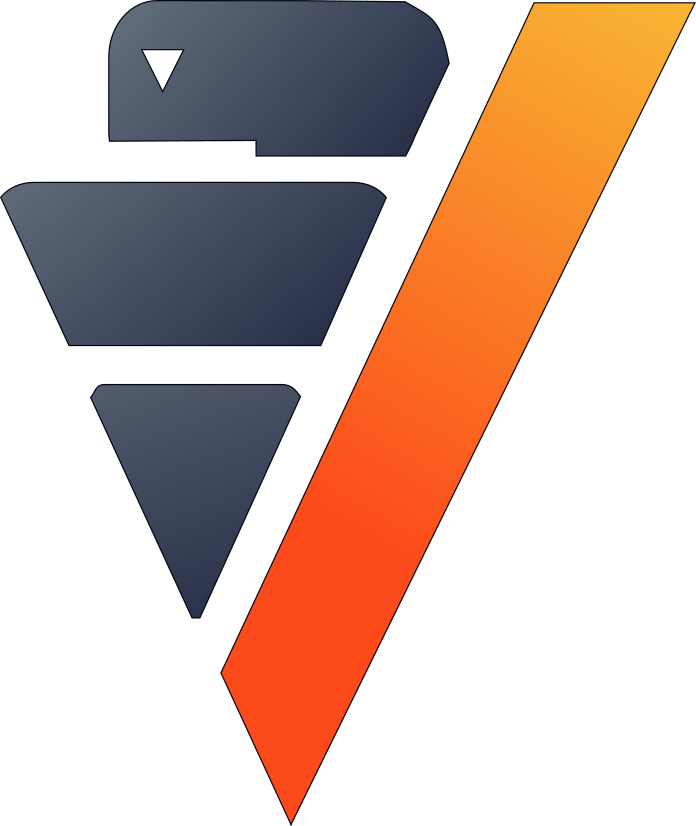

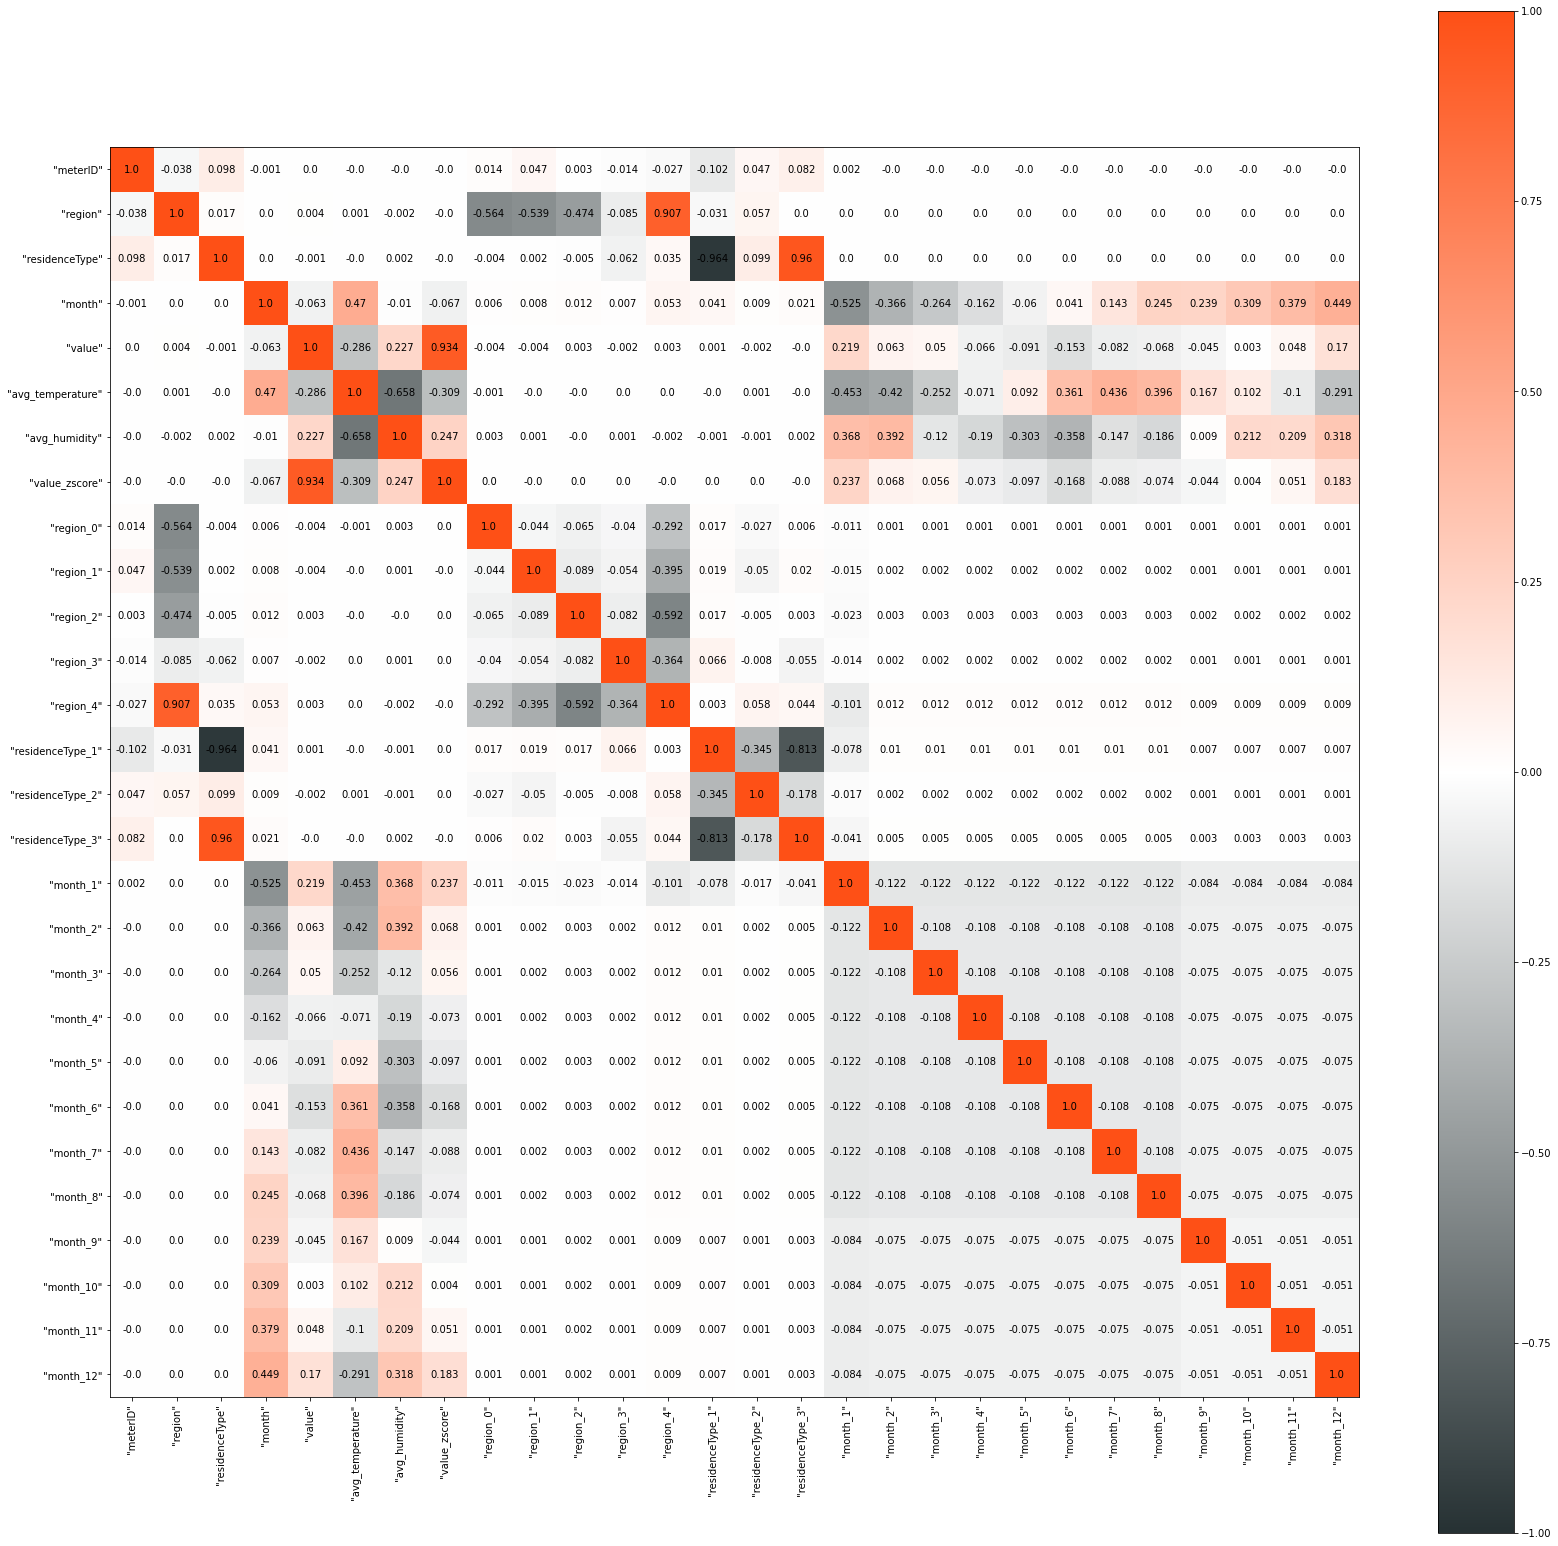

In [23]:
sm_consumption_month.corr()

There's a clear correlation between the month and energy consumption, but this isn't causal. Instead, we can think of the weather as having the direct influence on energy consumption. To accomodate for this view, we'll use the temperature as a predictor (rather than the month).

"value"  
"value"                                  1.0  
"value_zscore"             0.934346221805581  
"avg_temperature"         -0.286002119828714  
"avg_humidity"             0.226840366290784  
"month_1"                  0.219480342881377  
"month_12"                 0.170203430554323  
"month_6"                 -0.152884648437902  
"month_5"                 -0.091208055644822  
"month_7"                -0.0821649426287596  
"month_8"                -0.0682407716347868  
"month_4"                -0.0661901237431247  
"month_2"                 0.0633433193874819  
"month"                  -0.0631050387695357  
"month_3"                 0.0503407640346705  
"month_11"                0.0476690731851529  
"month_9"                -0.0450040710314486  
"region_0"              -0.00416924243520411  
"region"                 0.00391838085849298  
"region_1"              -0.00382241121967591  
"region_4"               0.00268770872382402  
"month_10"               0.00266779894718576  
"region_2"               0.00259294684655743  
"region_3"              -0.00184644046736284  
"residenceType_2"       -0.00178196776030956  
"residenceType_1"        0.00102728747461828  
"residenceType"         -0.00058821325675922  
"meterID"               0.000429585019171308  
"residenceType_3"      -7.98952664875218e-05  
Rows: 1-28 | Columns: 2
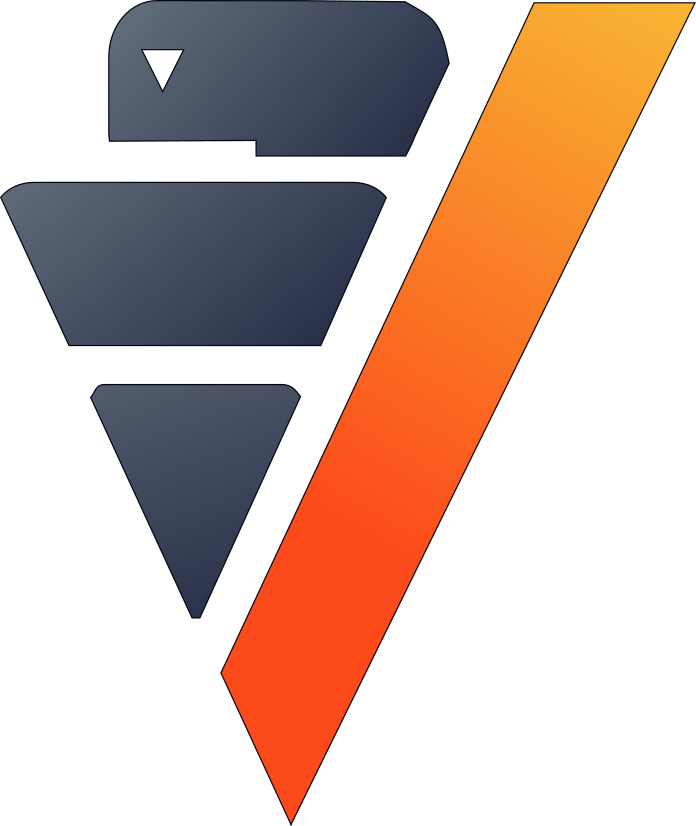

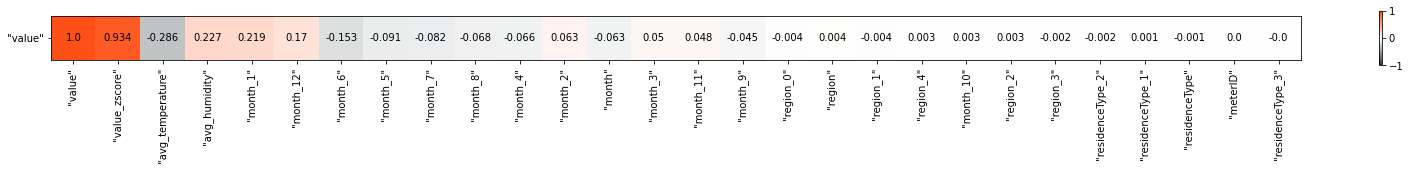

In [24]:
sm_consumption_month.corr(focus = "value")

<b>Global Behavior</b>

Let's look at this globally.

<AxesSubplot:xlabel='"date_month"', ylabel='"avg_value"'>

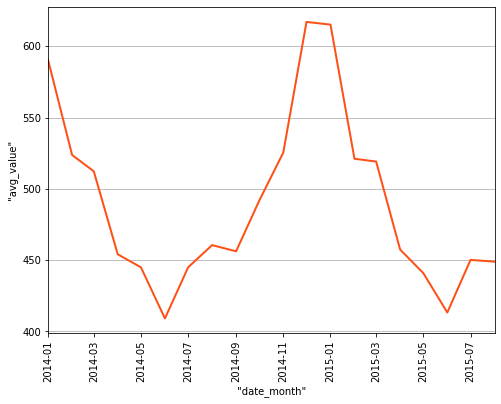

In [25]:
sm_consumption_final = sm_consumption_month.groupby(
                            ["date_month"], 
                            [st.avg(sm_consumption_month["avg_temperature"])._as("avg_temperature"),
                             st.avg(sm_consumption_month["avg_humidity"])._as("avg_humidity"),
                             st.avg(sm_consumption_month["value"])._as("avg_value")])
sm_consumption_final.plot(ts = "date_month", columns = ["avg_value"])

We expect to see a fall in energy consumption during summer and then an increase during the winter. A simple prediction could use the average value a year before.

0.987990336935642

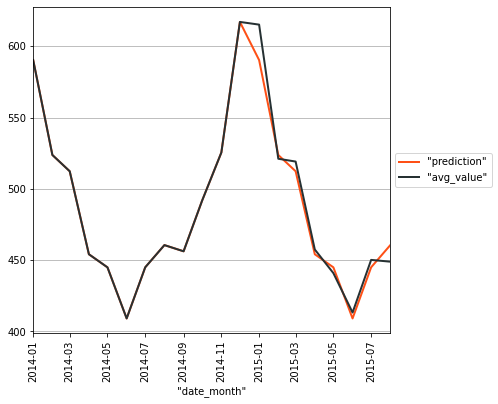

In [26]:
sm_consumption_final["prediction"] = st.case_when(sm_consumption_final["date_month"] < '2015-01-01', 
                                                  sm_consumption_final["avg_value"],
                                                  st.lag(sm_consumption_final["avg_value"], 12)._over(
                                                                                order_by = ["date_month"]))
sm_consumption_final.plot(ts = "date_month", columns = ["prediction", "avg_value"])
sm_consumption_final.score("avg_value", "prediction", "r2")

As expected, our model's score is excellent.

Let's use machine learning to understand the influence of the weather and the humidity on energy consumption.

## Machine Learning

Let's create our model.

value  
Dep. Variable                     "avg_value"  
Model                        LinearRegression  
No. Observations                         20.0  
No. Predictors                              2  
R-squared                    0.79911369421353  
Adj. R-squared             0.7754800111798276  
F-statistic                 33.81249096905816  
Prob (F-statistic)      3.837253952408389e-07  
Kurtosis                  -0.0457129692472424  
Skewness                    0.893296166786593  
Jarque-Bera (JB)             3.65140760780652  
Rows: 1-11 | Columns: 2
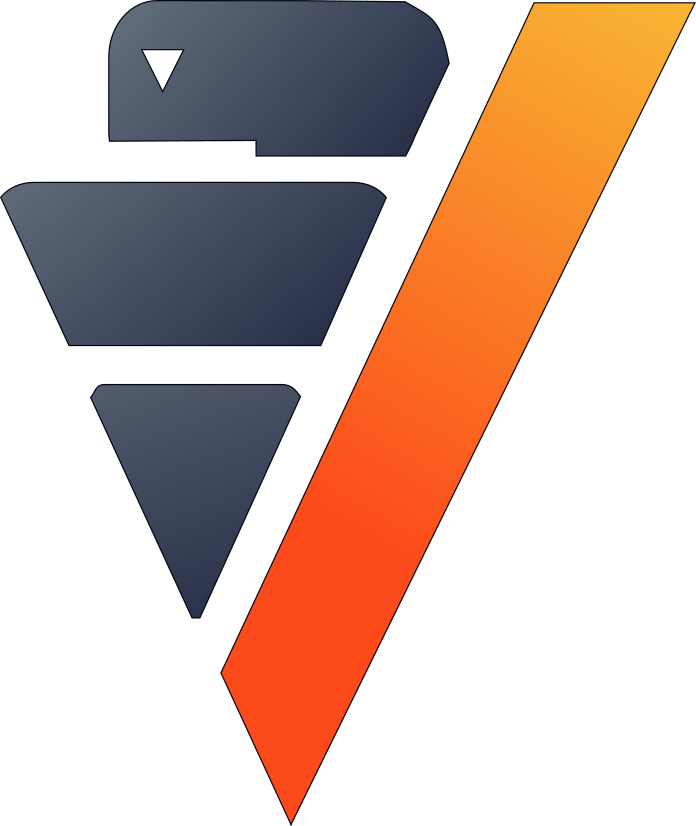

In [27]:
from verticapy.learn.linear_model import LinearRegression

predictors = ["avg_temperature",
              "avg_humidity"]
model = LinearRegression("sm_lr", solver = "BFGS")
model.fit(sm_consumption_final, 
          predictors,
          "avg_value")
model.report("details")

The model seems to be good with an adjusted R2 of 77.5%, and the F-Statistic indicates that at least one of the two predictors is useful. Let's look at the residual plot.

<AxesSubplot:xlabel='"avg_value"', ylabel='"residual"'>

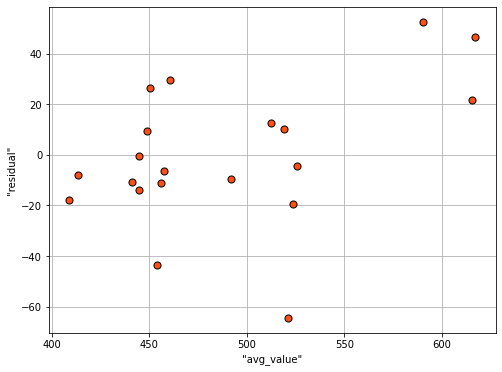

In [28]:
sm_consumption_final = model.predict(sm_consumption_final, 
                                     name = "value_prediction")
sm_consumption_final["residual"] = sm_consumption_final["avg_value"] - sm_consumption_final["value_prediction"]
sm_consumption_final.scatter(["avg_value", "residual"])

Looking at the residual plot, we can see that the error variance varies by quite a bit. A possible suspect might be heteroscedasticity. Let's verify our hypothesis using a Breusch-Pagan test.

value  
Lagrange Multiplier Statistic        6.066154825831241  
lm_p_value                         0.04816717950866987  
F Value                              3.700508752254135  
f_p_value                          0.04632851414387972  
Rows: 1-4 | Columns: 2
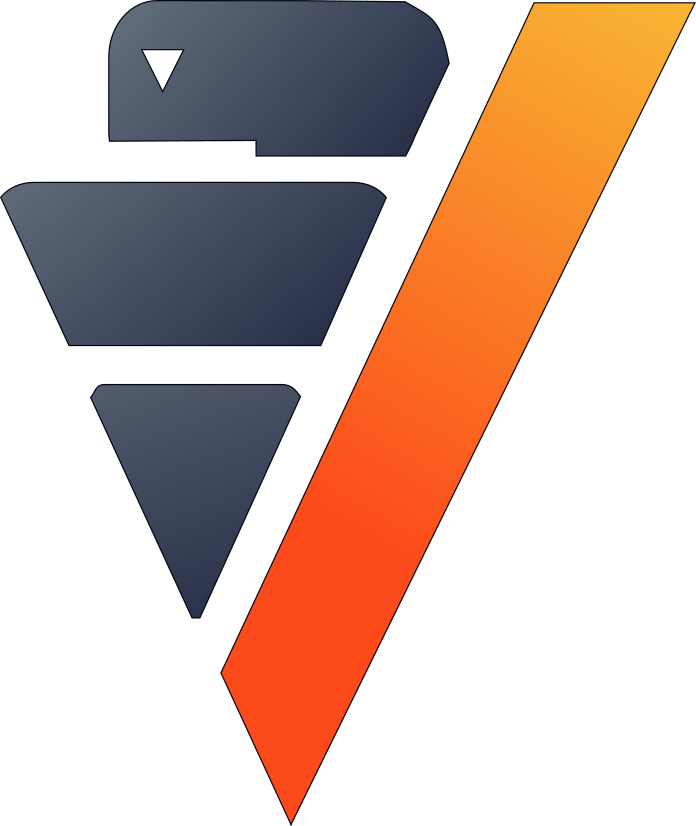

In [29]:
from verticapy.stats import het_breuschpagan

het_breuschpagan(sm_consumption_final, "residual", predictors)

The p-value is 4.81% and sits around the 5% threshold, so we can't really draw any conclusions.

Let's look at the entire regression report.

value  
explained_variance            0.799113694213527  
max_error                      64.4503700445748  
median_absolute_error          13.1054316247273  
mean_absolute_error            20.9034976459432  
mean_squared_error              734.33259460088  
root_mean_squared_error       27.09857181847191  
r2                             0.79911369421353  
r2_adj                       0.7754800111798276  
aic                          139.47924104286193  
bic                           140.9664378635239  
Rows: 1-10 | Columns: 2
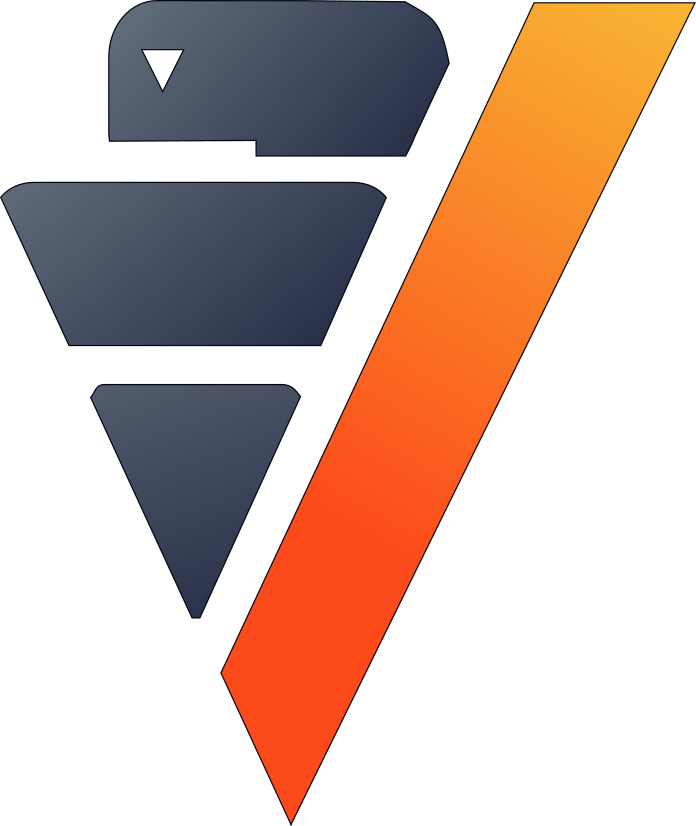

In [30]:
model.report()

Our model is very good; its median absolute error is around 13kWh. 

With this model, we can make predictions about the energy consumption of households per region. If the usage exceeds what the model predicts, we can raise an alert and respond, for example, by regulating the electricity distributed to the region.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!